In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:20<00:00, 327kB/s]


In [4]:
image_path = 'fruits.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = model(img)

0: 448x640 9 kites, 75.7ms
Speed: 3.8ms preprocess, 75.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        cls = int(box.cls[0].item())
        print(f"Class: {model.names[cls]}, Confidence: {conf:.2f}, Box: [{x1}, {y1}, {x2}, {y2}]")

Class: kite, Confidence: 0.75, Box: [95, 102, 301, 291]
Class: kite, Confidence: 0.72, Box: [363, 104, 554, 289]
Class: kite, Confidence: 0.66, Box: [115, 388, 278, 589]
Class: kite, Confidence: 0.49, Box: [1169, 372, 1367, 573]
Class: kite, Confidence: 0.36, Box: [99, 668, 304, 846]
Class: kite, Confidence: 0.35, Box: [1166, 669, 1378, 845]
Class: kite, Confidence: 0.31, Box: [1175, 109, 1372, 300]
Class: kite, Confidence: 0.29, Box: [626, 401, 837, 570]
Class: kite, Confidence: 0.28, Box: [396, 669, 541, 847]


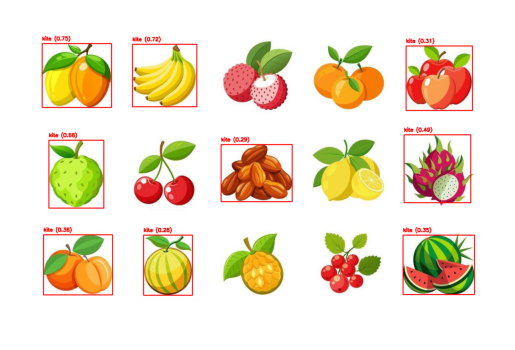

In [9]:
# Draw boxes on the image
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        cls = int(box.cls[0].item())

        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = f"{model.names[cls]} ({conf:.2f})"
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display image with detections
plt.imshow(img)
plt.axis("off")
plt.savefig('result.jpg')
plt.show()